In [1]:
import os
import numpy as np
from scipy.io import loadmat
import h5py

In [2]:
import os

mat_path = r"E:\radboud\Masters Thesis\source data\neural data\TVSD\MonkeyN\THINGS_normMUA.mat"

print(os.path.exists(mat_path))  # should print True

with h5py.File(mat_path, "r") as f:
    print("Top-level keys in file:", list(f.keys()))


True
Top-level keys in file: ['SNR', 'SNR_max', 'lats', 'oracle', 'reliab', 'tb', 'test_MUA', 'test_MUA_reps', 'train_MUA']


In [3]:
def inspect_h5(group, indent=0, max_depth=10):
    """Recursively print structure of an HDF5 file/group (datasets, shapes, dtypes, attrs)."""
    ind = " " * indent

    # Show attributes on this group/file
    if len(group.attrs) > 0:
        print(f"{ind}Attributes:")
        for k, v in group.attrs.items():
            print(f"{ind}  @{k} = {v}")

    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print(f"{ind}{key}/  (GROUP)")
            if indent // 2 < max_depth:
                inspect_h5(item, indent + 2, max_depth=max_depth)
            else:
                print(f"{ind}  (max depth reached here)")
        elif isinstance(item, h5py.Dataset):
            print(f"{ind}{key}  (DATASET) shape={item.shape}, dtype={item.dtype}")
            if len(item.attrs) > 0:
                for ak, av in item.attrs.items():
                    print(f"{ind}  @{ak} = {av}")
        else:
            print(f"{ind}{key}: unknown type {type(item)}")


In [4]:
with h5py.File(mat_path, "r") as f:
    print("=== FULL HDF5 STRUCTURE ===")
    inspect_h5(f, indent=0, max_depth=8)


=== FULL HDF5 STRUCTURE ===
SNR  (DATASET) shape=(4, 1024), dtype=float64
  @MATLAB_class = b'double'
SNR_max  (DATASET) shape=(1024, 1), dtype=float64
  @MATLAB_class = b'double'
lats  (DATASET) shape=(4, 1024), dtype=float64
  @MATLAB_class = b'double'
oracle  (DATASET) shape=(1024, 1), dtype=float64
  @MATLAB_class = b'double'
reliab  (DATASET) shape=(435, 1024), dtype=float64
  @MATLAB_class = b'double'
tb  (DATASET) shape=(300, 1), dtype=float64
  @MATLAB_class = b'double'
test_MUA  (DATASET) shape=(100, 1024), dtype=float64
  @MATLAB_class = b'double'
test_MUA_reps  (DATASET) shape=(30, 100, 1024), dtype=float64
  @MATLAB_class = b'double'
train_MUA  (DATASET) shape=(22248, 1024), dtype=float64
  @MATLAB_class = b'double'


### TVSD – `THINGS_normMUA.mat` (Monkey F): HDF5 structure

This file contains **pre-processed, normalized multi-unit activity (MUA)** and quality metrics,
already averaged over a stimulus-response time window. Each row (or index) refers to **stimuli**,
each column to **electrodes** (1024 total). :contentReference[oaicite:0]{index=0}  

---

#### Overview table

| Dataset name      | Shape             | Axes (Python)                              | Meaning (short)                                   |
|-------------------|-------------------|--------------------------------------------|---------------------------------------------------|
| `SNR`             | `(4, 1024)`       | day × electrode                            | Signal-to-noise ratio per day and electrode       |
| `SNR_max`         | `(1024, 1)`       | electrode × 1                              | Max SNR per electrode                             |
| `lats`            | `(4, 1024)`       | day × electrode                            | Response latency (ms) per day and electrode       |
| `oracle`          | `(1024, 1)`       | electrode × 1                              | Oracle noise ceiling per electrode                |
| `reliab`          | `(435, 1024)`     | pair-of-reps × electrode                   | Pairwise test-repetition reliability              |
| `tb`              | `(300, 1)`        | time-samples × 1                           | Time vector (ms) used to define averaging window  |
| `test_MUA`        | `(100, 1024)`     | test-image × electrode                     | Mean normalized response to each **test** image   |
| `test_MUA_reps`   | `(30, 100, 1024)` | repetition × test-image × electrode        | Single-trial test responses                       |
| `train_MUA`       | `(22248, 1024)`   | train-image × electrode                    | Mean normalized response to each **train** image  |

--

In [5]:
import h5py
import numpy as np

TVSD_norm_MUA_path = r"E:\radboud\Masters Thesis\source data\neural data\TVSD\MonkeyN\THINGS_normMUA.mat"

with h5py.File(TVSD_norm_MUA_path, "r") as f:
    # 1. Inspect what's inside the file
    print("Top-level datasets/groups in file:")
    for name, obj in f.items():
        try:
            shape = obj.shape
        except AttributeError:
            shape = "<group>"
        print(f"  {name:15s}  shape: {shape}")

    # 2. Load specific datasets into NumPy arrays
    SNR           = np.array(f["SNR"])             # (4, 1024)
    SNR_max       = np.array(f["SNR_max"])         # (1024, 1)
    lats          = np.array(f["lats"])            # (4, 1024)
    oracle        = np.array(f["oracle"])          # (1024, 1)
    reliab        = np.array(f["reliab"])          # (435, 1024)
    tb            = np.array(f["tb"])              # (300, 1)
    test_MUA      = np.array(f["test_MUA"])        # (100, 1024)
    test_MUA_reps = np.array(f["test_MUA_reps"])   # (30, 100, 1024)
    train_MUA     = np.array(f["train_MUA"])       # (22248, 1024)


Top-level datasets/groups in file:
  SNR              shape: (4, 1024)
  SNR_max          shape: (1024, 1)
  lats             shape: (4, 1024)
  oracle           shape: (1024, 1)
  reliab           shape: (435, 1024)
  tb               shape: (300, 1)
  test_MUA         shape: (100, 1024)
  test_MUA_reps    shape: (30, 100, 1024)
  train_MUA        shape: (22248, 1024)


Image index: 0
Response vector shape: (1024,)
min = -1.141, max = 2.550, mean = -0.150, std = 0.518

Top 10 electrodes (index: value):
   651: 2.550
   771: 2.300
   685: 2.153
   907: 1.912
   947: 1.824
   962: 1.688
   901: 1.683
   909: 1.601
   881: 1.588
   916: 1.464


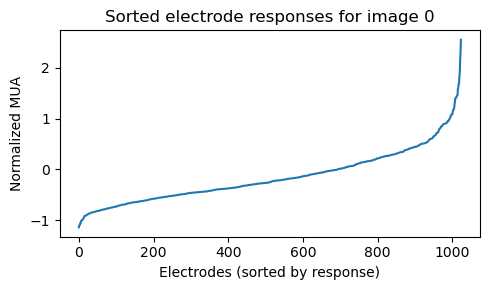

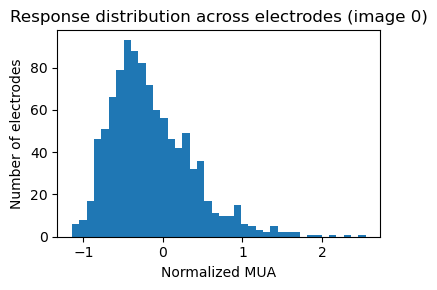

In [6]:
## Vis
import numpy as np
import matplotlib.pyplot as plt
# V1: 25–125 ms
# V4: 50–150 ms
# IT: 75–175 ms
# --- pick a training image index ---
# valid range: 0 .. train_MUA.shape[0] - 1  (22248 images)
train_idx = 0   # change this to inspect other images

resp = train_MUA[train_idx, :]   # shape: (1024,) – one value per electrode

print(f"Image index: {train_idx}")
print(f"Response vector shape: {resp.shape}")
print(f"min = {resp.min():.3f}, max = {resp.max():.3f}, mean = {resp.mean():.3f}, std = {resp.std():.3f}")

# electrodes with strongest responses for this image
top_k = 10
top_elec = np.argsort(resp)[-top_k:][::-1]
print(f"\nTop {top_k} electrodes (index: value):")
for e in top_elec:
    print(f"  {int(e):4d}: {resp[e]:.3f}")


# --- plot 2: sorted responses (to see distribution more clearly) ---
sorted_resp = np.sort(resp)

plt.figure(figsize=(5, 3))
plt.plot(sorted_resp)
plt.xlabel("Electrodes (sorted by response)")
plt.ylabel("Normalized MUA")
plt.title(f"Sorted electrode responses for image {train_idx}")
plt.tight_layout()
plt.show()

# --- plot 3: histogram of electrode responses ---
plt.figure(figsize=(4, 3))
plt.hist(resp, bins=40)
plt.xlabel("Normalized MUA")
plt.ylabel("Number of electrodes")
plt.title(f"Response distribution across electrodes (image {train_idx})")
plt.tight_layout()
plt.show()


## Linking MUA to img

### load things_imgs.mat

In [7]:
import h5py
import numpy as np

log_path = r"E:\radboud\Masters Thesis\source data\neural data\TVSD\monkeyN\_logs\things_imgs.mat"

# --- open file with h5py ---
with h5py.File(log_path, "r") as f:
    print("Top-level keys in things_imgs.mat:", list(f.keys()))
    train_imgs_group = f["train_imgs"]
    test_imgs_group  = f["test_imgs"]

    print("\nFields in train_imgs:", list(train_imgs_group.keys()))
    print("Fields in test_imgs :", list(test_imgs_group.keys()))

    # helper: convert an HDF5 "struct" group into dict of numpy arrays
    def h5_struct_to_dict(group):
        out = {}
        for key, val in group.items():
            if isinstance(val, h5py.Dataset):
                out[key] = np.array(val).squeeze()
            elif isinstance(val, h5py.Group):
                out[key] = h5_struct_to_dict(val)
        return out

    train_imgs = h5_struct_to_dict(train_imgs_group)
    test_imgs  = h5_struct_to_dict(test_imgs_group)

# --- quick sanity check / peek ---
print("\ntrain_imgs fields and shapes:")
for k, v in train_imgs.items():
    print(f"  {k:15s} -> {v.shape}")

print("\nExample entries for the first training image:")
idx = 0
for k, v in train_imgs.items():
    if v.ndim == 0:
        print(f"  {k:15s}: {v}")
    elif v.shape[0] > idx:
        print(f"  {k:15s}: {v[idx]}")


Top-level keys in things_imgs.mat: ['#refs#', 'test_imgs', 'train_imgs']

Fields in train_imgs: ['class', 'local_path', 'things_path']
Fields in test_imgs : ['class', 'local_path', 'things_path']

train_imgs fields and shapes:
  class           -> (22248,)
  local_path      -> (22248,)
  things_path     -> (22248,)

Example entries for the first training image:
  class          : <HDF5 object reference>
  local_path     : <HDF5 object reference>
  things_path    : <HDF5 object reference>


In [8]:
import h5py
import numpy as np

log_path = r"E:\radboud\Masters Thesis\source data\neural data\TVSD\monkeyN\_logs\things_imgs.mat"

with h5py.File(log_path, "r") as f:
    train_group = f["train_imgs"]
    test_group  = f["test_imgs"]

    class_refs       = train_group["class"][()]        # (22248,)
    local_path_refs  = train_group["local_path"][()]   # (22248,)
    things_path_refs = train_group["things_path"][()]  # (22248,)

    print("class_refs shape:", class_refs.shape, "dtype:", class_refs.dtype)
    print("local_path_refs shape:", local_path_refs.shape, "dtype:", local_path_refs.dtype)
    print("things_path_refs shape:", things_path_refs.shape, "dtype:", things_path_refs.dtype)

    def unwrap_ref(ref):
        """
        Unwrap a reference that may be:
          - an h5py.Reference
          - a 0-d or 1-d numpy array containing a Reference
        and return a true h5py.Reference.
        """
        # Direct reference
        if isinstance(ref, h5py.Reference):
            return ref

        # 0-d / 1-d numpy array wrapping the reference
        arr = np.array(ref)
        if arr.dtype == object and arr.size > 0:
            inner = arr.ravel()[0]
            if isinstance(inner, h5py.Reference):
                return inner
            # if it's still an array, recurse once
            if isinstance(inner, np.ndarray):
                return unwrap_ref(inner)

        # Fallback: just try to treat ref as-is (will error if wrong)
        return ref

    def dset_to_str(dset):
        """
        Convert a dataset (often MATLAB char array) to a Python string.
        Handles:
          - bytes
          - numpy arrays of 'S'/'U'
          - numpy arrays of uint16/int16/int32 char codes
        """
        data = dset[()]  # grab contents

        # plain python types
        if isinstance(data, bytes):
            return data.decode("utf-8")
        if isinstance(data, str):
            return data

        arr = np.array(data)

        # string-like arrays
        if arr.dtype.kind in {"S", "U"}:
            flat = arr.ravel()
            parts = []
            for x in flat:
                if isinstance(x, (bytes, bytearray)):
                    parts.append(x.decode("utf-8"))
                else:
                    parts.append(str(x))
            return "".join(parts)

        # numeric char codes (MATLAB-style)
        if arr.dtype in (np.uint16, np.int16, np.int32, np.int64):
            chars = [chr(int(c)) for c in arr.ravel() if int(c) != 0]
            return "".join(chars)

        # last resort
        return str(arr)

    def refs_to_str_array(refs):
        strings = []
        for ref in refs:
            href = unwrap_ref(ref)
            dset = f[href]           # <--- this is where we previously passed an ndarray
            s = dset_to_str(dset)
            strings.append(s)
        return np.array(strings, dtype=object)

    train_class       = refs_to_str_array(class_refs)
    train_local_path  = refs_to_str_array(local_path_refs)
    train_things_path = refs_to_str_array(things_path_refs)

print("train_class[0]:      ", train_class[0])
print("train_local_path[0]: ", train_local_path[0])
print("train_things_path[0]:", train_things_path[0])
print("n_train:", len(train_things_path))


class_refs shape: (22248, 1) dtype: object
local_path_refs shape: (22248, 1) dtype: object
things_path_refs shape: (22248, 1) dtype: object
train_class[0]:       aardvark
train_local_path[0]:  \\vs03\VS03-VandC-2\THINGS\Passive_Fixation\_stims\THINGS_train\00001.bmp
train_things_path[0]: aardvark\aardvark_01b.jpg
n_train: 22248


Image path: E:\radboud\Masters Thesis\source data\image data\THINGS\images_THINGS\object_images\aardvark\aardvark_01b.jpg


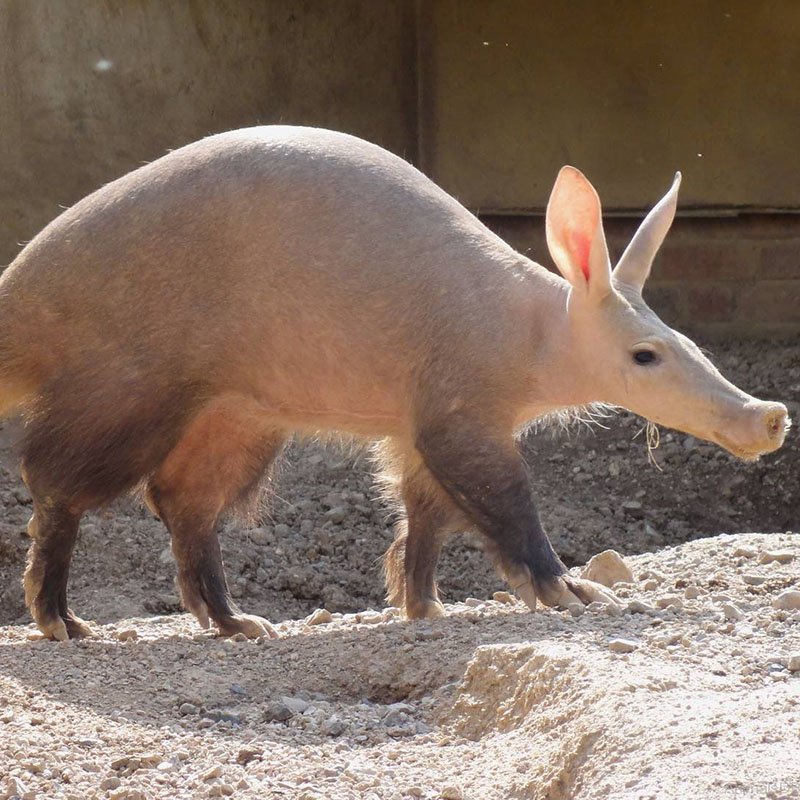

In [9]:
## Load actual image using this information

import os
from PIL import Image

THINGS_ROOT = r"E:\radboud\Masters Thesis\source data\image data\THINGS"   # adjust to your setup
OBJECT_IMAGES = os.path.join(THINGS_ROOT,"images_THINGS", "object_images")

i = 0  # training image index

mua_vec  = train_MUA[i, :]              # (1024,) neural response
rel_path = train_things_path[i]         # e.g. "aardvark/aardvark_01b.jpg"
img_path = os.path.join(OBJECT_IMAGES, rel_path)

print("Image path:", img_path)
img = Image.open(img_path)
display(img)


In [10]:
from PIL import Image
import os

THINGS_ROOT = r"E:\radboud\Masters Thesis\source data\image data\THINGS"   # adjust to your setup
OBJECT_IMAGES = os.path.join(THINGS_ROOT,"images_THINGS", "object_images")

i = 0
rel_path = train_things_path[i]   # e.g. "aardvark/aardvark_01b.jpg"
img_path = os.path.join(OBJECT_IMAGES, rel_path)

img = Image.open(img_path).convert("RGB")

# resize to 500x500 as in TVSD
img_500 = img.resize((500, 500), Image.BILINEAR)



In [11]:
train_things_path

array(['aardvark\\aardvark_01b.jpg', 'aardvark\\aardvark_02s.jpg',
       'aardvark\\aardvark_03s.jpg', ..., 'zucchini\\zucchini_10s.jpg',
       'zucchini\\zucchini_11s.jpg', 'zucchini\\zucchini_12s.jpg'],
      shape=(22248,), dtype=object)

In [12]:
# BRING IT TOGETHER

object_path = OBJECT_IMAGES
mua_path = TVSD_norm_MUA_path

image_idx = 1
concept_label = train_class[image_idx]          # e.g. absolute label ~"aardvark"
# set path to img
rel_path      = train_things_path[image_idx]    # e.g. relative path to image ~ "aardvark/aardvark_01b.jpg"
# load img
img_path = os.path.join(object_path, rel_path)
img = Image.open(img_path).convert("RGB")
img_500 = img.resize((500, 500), Image.BILINEAR)
#load
# load MUA
mua_vec = train_MUA[image_idx,:]

